<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

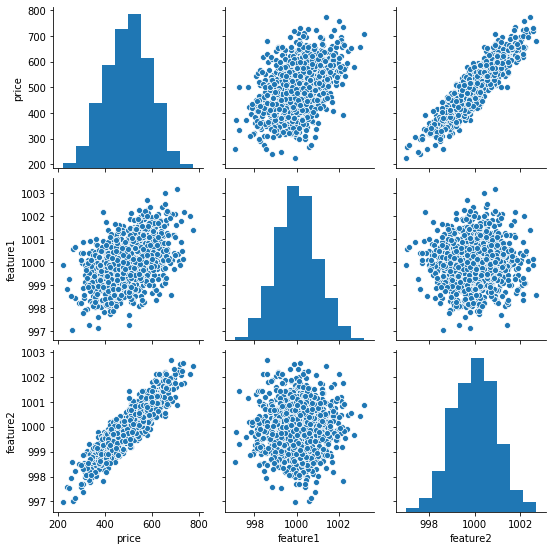

In [5]:
sns.pairplot(df)

## Comment: 
Based on the charts we can see that `feature2` and `price` have a high correlation

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.


## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [21]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

### Model - as a list of layers

In [22]:
# Can be created like this

model = Sequential([
    Dense(4,activation='relu'),
    Dense(2,activation='relu'),
    Dense(1),
])

# But preferably like this because it is easier to try
# different layers.

model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

### Model - adding in layers one by one

Let's go ahead and build a simple model and then compile it by defining our solver

In [23]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

## For a multi-class classification problem
`model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])`

## For a binary classification problem
`model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])`

 ## For a mean squared error regression problem
`model.compile(optimizer='rmsprop',
                loss='mse')`

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [24]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 7ms/step - loss: 256845.0312
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256514.1094
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256310.0156
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256116.9375
Epoch 5/250
22/22 [==============================] - 0s 6ms/step - loss: 255885.3281
Epoch 6/250
22/22 [==============================] - 0s 6ms/step - loss: 255616.0156
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 255304.2812
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 254949.8906
Epoch 9/250
22/22 [==============================] - 0s 7ms/step - loss: 254550.7812
Epoch 10/250
22/22 [==============================] - 0s 6ms/step - loss: 254099.0469
Epoch 11/250
22/22 [==============================] - 0s 7ms/step - loss: 253587.2188
Epoch 12/250
22/22 [==============================] - 0s 5ms/st

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [25]:
loss = model.history.history['loss']

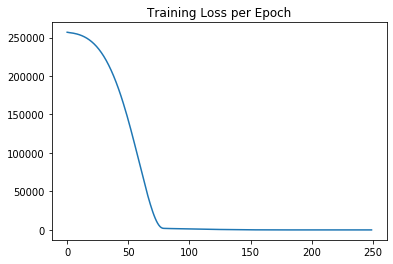

In [26]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [27]:
model.metrics_names

['loss']

In [28]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [29]:
training_score

25.46257209777832

In [30]:
test_score

25.703882217407227

### Further Evaluations

In [31]:
test_predictions = model.predict(X_test)

In [32]:
test_predictions

array([[404.41675],
       [622.40076],
       [591.03235],
       [571.1474 ],
       [365.78592],
       [578.0939 ],
       [514.0414 ],
       [458.17105],
       [548.19446],
       [446.59775],
       [610.6615 ],
       [547.90265],
       [418.2098 ],
       [407.99142],
       [650.07446],
       [436.38876],
       [507.45776],
       [658.7446 ],
       [661.39557],
       [564.47144],
       [333.43887],
       [443.9125 ],
       [381.67953],
       [377.9147 ],
       [565.52563],
       [609.4669 ],
       [531.36255],
       [426.96042],
       [654.26404],
       [413.1999 ],
       [441.71982],
       [484.158  ],
       [437.50162],
       [680.63666],
       [423.86456],
       [416.79636],
       [500.94214],
       [549.42633],
       [508.7299 ],
       [394.49197],
       [617.45984],
       [415.74326],
       [603.3351 ],
       [445.04117],
       [500.99857],
       [580.6337 ],
       [667.8112 ],
       [489.42844],
       [317.8141 ],
       [484.4566 ],


In [33]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [34]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [35]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [36]:
test_predictions

0      404.416748
1      622.400757
2      591.032349
3      571.147400
4      365.785919
          ...    
295    528.019165
296    514.316650
297    608.530273
298    416.070099
299    409.994202
Length: 300, dtype: float32

In [37]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [38]:
pred_df.columns = ['Test Y','Model Predictions']

In [39]:
pred_df

,Test Y,Model Predictions
0,402.296319,404.416748
1,624.156198,622.400757
2,582.455066,591.032349
3,578.588606,571.147400
4,371.224104,365.785919
...,...,...
295,525.704657,528.019165
296,502.909473,514.316650
297,612.727910,608.530273
298,417.569725,416.070099


Let's compare to the real test labels!

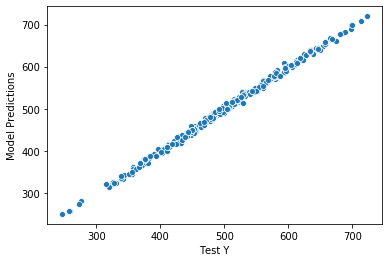

In [40]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [41]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

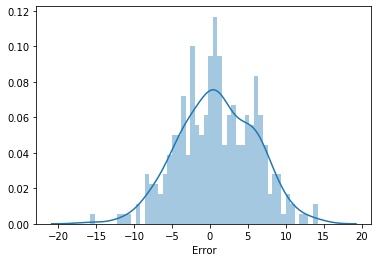

In [42]:
sns.distplot(pred_df['Error'],bins=50)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.0621301002868355

In [45]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.70388581161478

In [46]:
# Essentially the same thing, difference just due to precision
test_score

25.703882217407227

In [47]:
# RMSE
test_score**0.5

5.0698996259696525

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [48]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [49]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [50]:
new_gem = scaler.transform(new_gem)

In [51]:
model.predict(new_gem)

array([[418.79172]], dtype=float32)

## Saving and Loading a Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [54]:
later_model = load_model('my_model.h5')

In [55]:
later_model.predict(new_gem)

array([[418.79172]], dtype=float32)